# IMAGENET - RESNET50 - OBJECT DETECTION

In [1]:
from keras.applications import ResNet50
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

In [2]:
model = ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 1s 0us/step


In [3]:
def prepare_image(image, target):
	# resizing and preprocessing the input image
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# get the processed image
	return image

 * Loading the Image

--2023-03-08 17:17:21--  https://upload.wikimedia.org/wikipedia/commons/8/8b/Kangal_puppies.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 507755 (496K) [image/jpeg]
Saving to: ‘kangalDogs.jpg’

kangalDogs.jpg      100%[===================>] 495.85K  --.-KB/s    in 0.1s    

2023-03-08 17:17:22 (4.10 MB/s) - ‘kangalDogs.jpg’ saved [507755/507755]



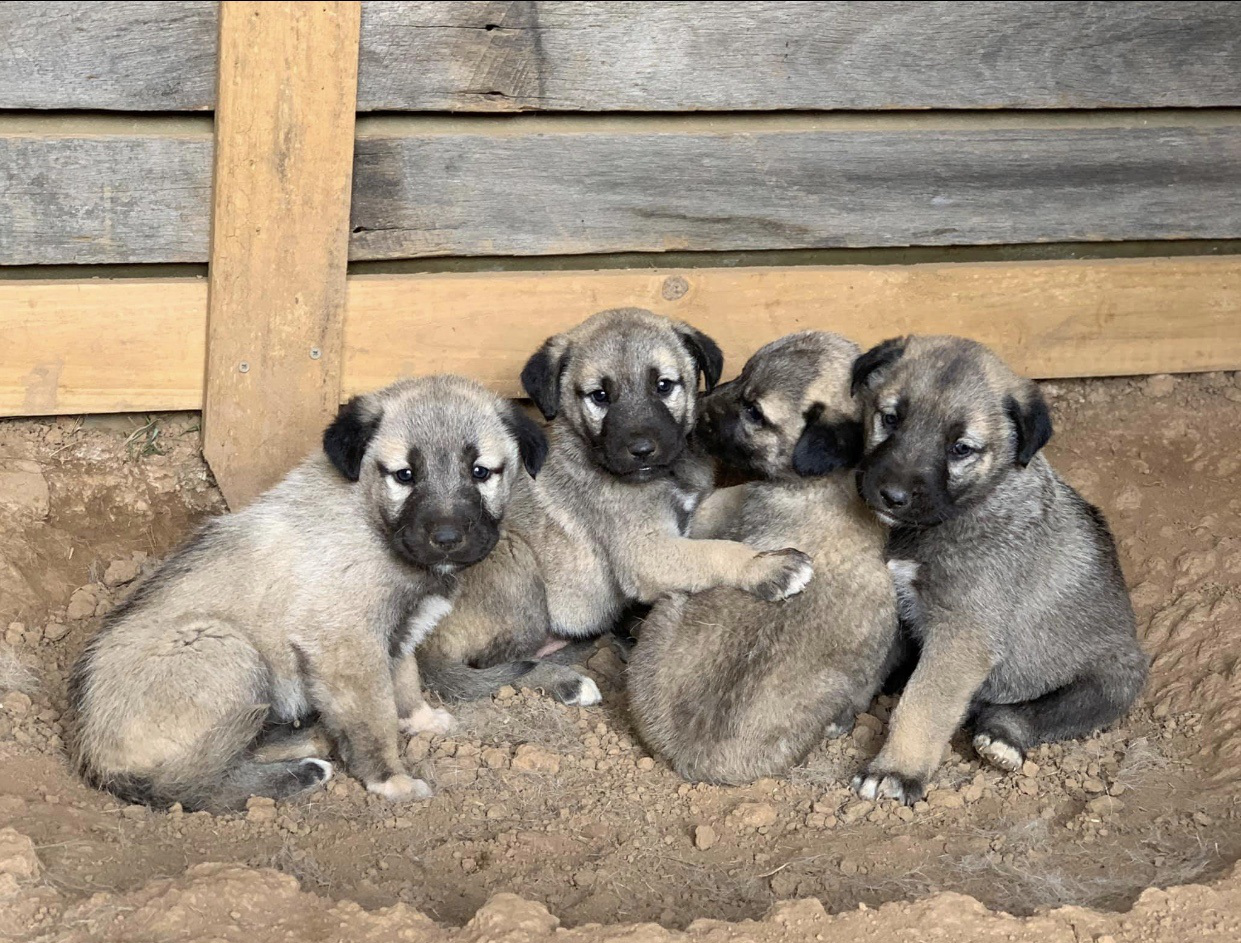

In [8]:
#!wget https://upload.wikimedia.org/wikipedia/commons/a/a9/Cats_in_Fushimi_Inari_Shrime_%2811315834234%29.jpg -O cats.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/8/8b/Kangal_puppies.jpg -O dogs.jpg

image = Image.open("dogs.jpg")
image

* Classify with the trained model.

In [9]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) # make it 224 x 224

preds = model.predict(pre_image) # apply the preprocessed image to the prediction model

results = imagenet_utils.decode_predictions(preds) #prediction
data["predictions"] = []


for (imagenetID, label, prob) in results[0]: # retrieve label, probability and prediction result from ImageNet dataset
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

1/1 [==============================] - 0s 29ms/step
{'success': True, 'predictions': [{'label': 'Norwegian_elkhound', 'probability': 0.9242400527000427}, {'label': 'Leonberg', 'probability': 0.02721310220658779}, {'label': 'keeshond', 'probability': 0.014284784905612469}, {'label': 'Great_Pyrenees', 'probability': 0.008456071838736534}, {'label': 'Irish_wolfhound', 'probability': 0.005837514530867338}]}


In [10]:
print("The classification predict is {1} with the highest rate of {0}.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"])) 
# highest probability result screen output

The classification predict is Norwegian_elkhound with the highest rate of 0.9242400527000427.
